# Explore here

In [13]:
# Your code here
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

In [14]:
# Path to the parent directory
path = "../data/raw/raw/train"

print(os.path.exists(path)) 


True


In [15]:
path = os.getcwd()
print(path)

filename = "dog.csv"

file_path = os.path.join(path, filename)

print(file_path)



/workspaces/fuschia-image-classifier/src
/workspaces/fuschia-image-classifier/src/dog.csv


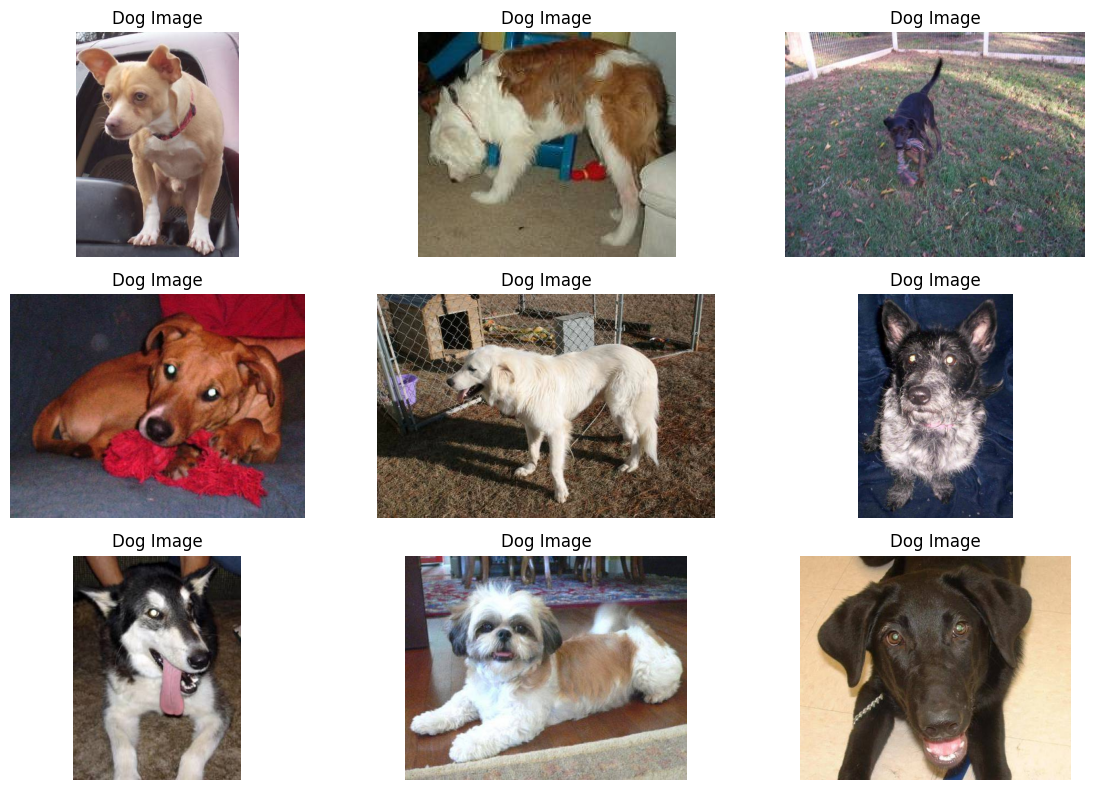

In [16]:
# Import and Check first 9 Dog Pictures

# Path to the directory containing your image data
data_dir = "../data/raw/raw/train"

# Get a list of all dog image file names
dog_subfolder = os.path.join(data_dir, "dog")

# Get a list of all dog image file names
dog_image_files = os.listdir(dog_subfolder)

# Load the first nine dog images
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()



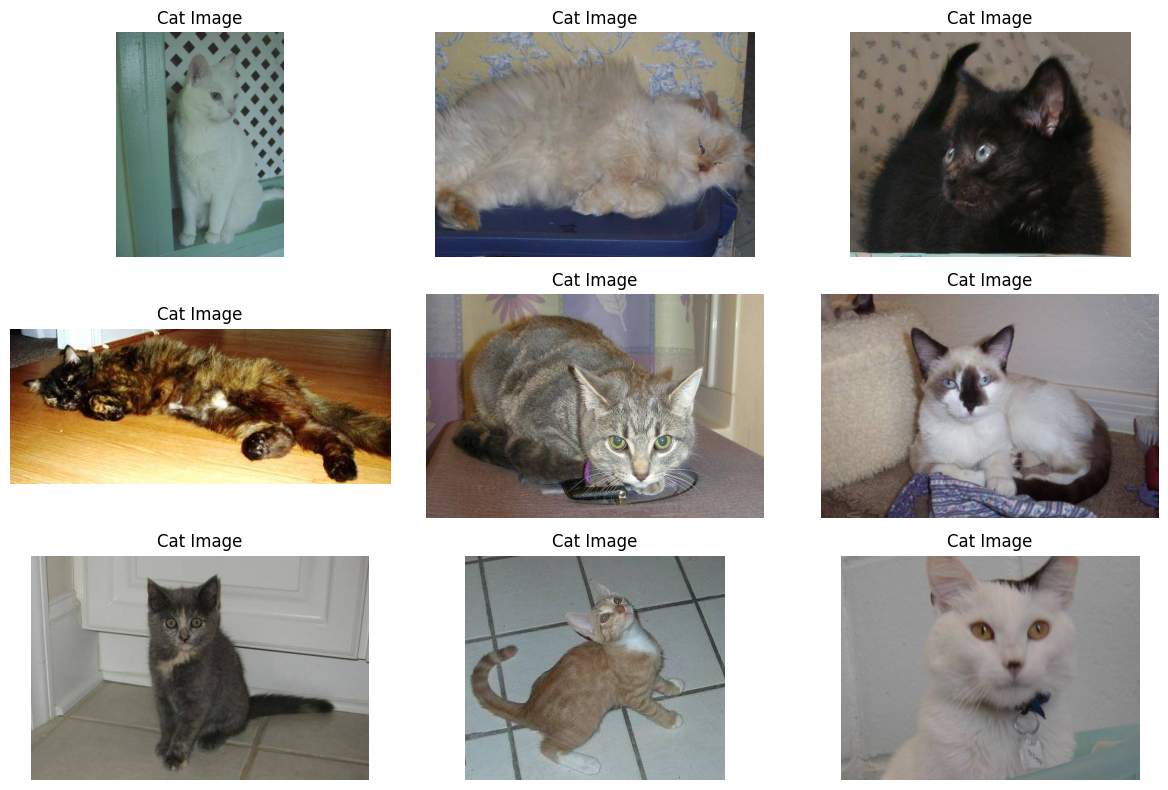

In [17]:
# Import and Check first 9 Cat Pictures

# Path to the directory containing your image data
data_dir = "../data/raw/raw/train"

# Get a list of all cat image file names
cats_subfolder = os.path.join(data_dir, "cat")

# Get a list of all Cat image file names
cats_image_files = os.listdir(cats_subfolder)

# Load the first nine cat images
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limit to available cat images
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Create a single figure to display all cat images
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    '../data/raw/raw/train',
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    '../data/raw/raw/train',
    target_size=(200, 200),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

set_random_seed(42)

In [20]:
#build the ANN and compile it
model = Sequential([
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(200, 200, 3)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [21]:
#train the model

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [22]:
# history = model.fit(
#     train_generator,
#     epochs=1,
#     validation_data=validation_generator,
#     callbacks=[checkpoint, early_stopping]

: 

In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Update the file extension to .keras
checkpoint = ModelCheckpoint("../models/vgg16_1.keras", monitor="val_accuracy", verbose=1, save_best_only=True, save_weights_only=False, mode="auto")
early = EarlyStopping(monitor="val_accuracy", patience=3, verbose=1, mode="auto")

# Train the model with the specified callbacks
hist = model.fit(train_generator, steps_per_epoch=100, validation_data=validation_generator, validation_steps=10, epochs=3, callbacks=[checkpoint, early])


Epoch 1/3


/home/vscode/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-08-14 21:27:30.030211: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 327680000 exceeds 10% of free system memory.
2024-08-14 21:27:30.506743: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 327680000 exceeds 10% of free system memory.
2024-08-14 21:28:04.626552: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 327680000 exceeds 10% of free system memory.
2024-08-14 21:28:04.879831: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 327680000 exceeds 10% of free system memory.


  1/100 ━━━━━━━━━━━━━━━━━━━━ 1:14:18 45s/step - accuracy: 0.5000 - loss: 0.6932

2024-08-14 21:28:08.230127: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 327680000 exceeds 10% of free system memory.


In [ ]:
# Check the Accuracy of the Data

# Plot the Results
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

NameError: name 'plt' is not defined

2024-08-14 20:22:49.491691: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-14 20:22:49.496789: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-14 20:22:49.512209: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-14 20:22:49.542965: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-14 20:22:49.555039: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-14 20:22:49.576341: I tensorflow/core/platform/cpu_feature_gu

ValueError: File not found: filepath=../models/vgg16_1.keras. Please ensure the file is an accessible `.keras` zip file.

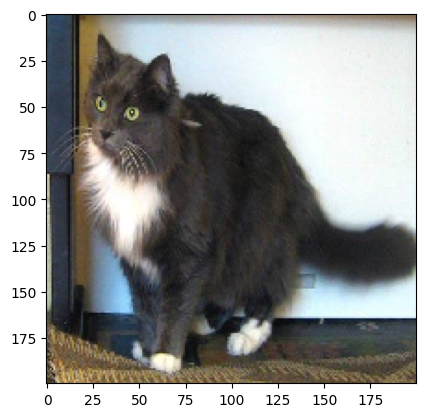

In [ ]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

img = image.load_img("../data/raw/raw/test1/9.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.keras")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")